# Project: Titanic - Machine Learning from Disaster

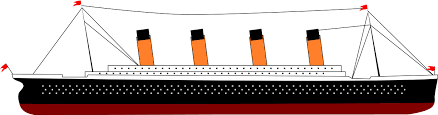


### Loading data

In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv("./data/train.csv",index_col="PassengerId")
test_df=pd.read_csv("./data/test.csv",index_col="PassengerId")

### Preview data


In [3]:
#preview data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


cột age, embarked và cabin bị thiếu dữ liệu


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


cột age, fare và cabin bị thiếu dữ liệu

categorical data: Pclass, survived, embarked, sibsp,Parch	
numerical data: age, fare

missing values data: age, fare, cabin

In [6]:
#covert datatype category function
cat_col=["Pclass","Survived","SibSp","Parch","Embarked"]
def convert(df,col):
    for col in col:
        df[col]=df[col].astype("category")
convert(train_df,cat_col)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(5), float64(2), object(4)
memory usage: 54.2+ KB


## Data Analysis

### Distribution of numerical data


In [8]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of categorical data


In [74]:
train_df.describe(include="category")

,Survived,Pclass,SibSp,Parch,Embarked,Family_Cat
count,891,891,891,891,889,891
unique,2,3,7,7,3,4
top,0,3,0,0,S,Single
freq,549,491,608,678,644,537


##### Survived

In [9]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [10]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


<AxesSubplot: xlabel='Survived', ylabel='count'>

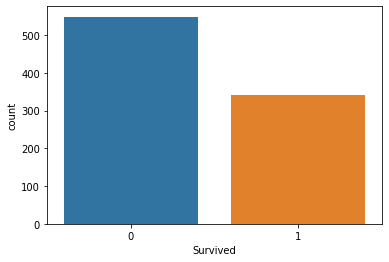

In [11]:
sns.countplot(data=train_df,x='Survived')

#### Sex


In [12]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [13]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<AxesSubplot: xlabel='Sex', ylabel='count'>

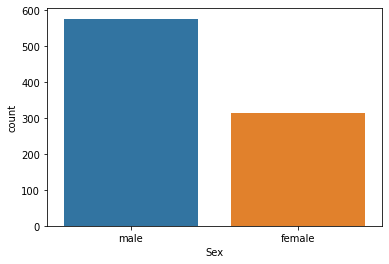

In [14]:
sns.countplot(data=train_df,x='Sex')

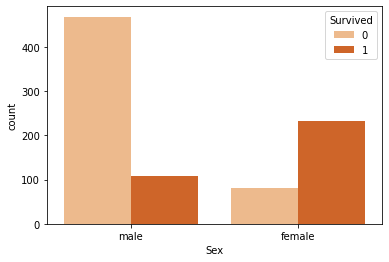

In [15]:
sns.countplot(data=train_df,x='Sex',hue='Survived',palette='Oranges');

tỉ lệ sống sót của nữ nhiều hơn nam

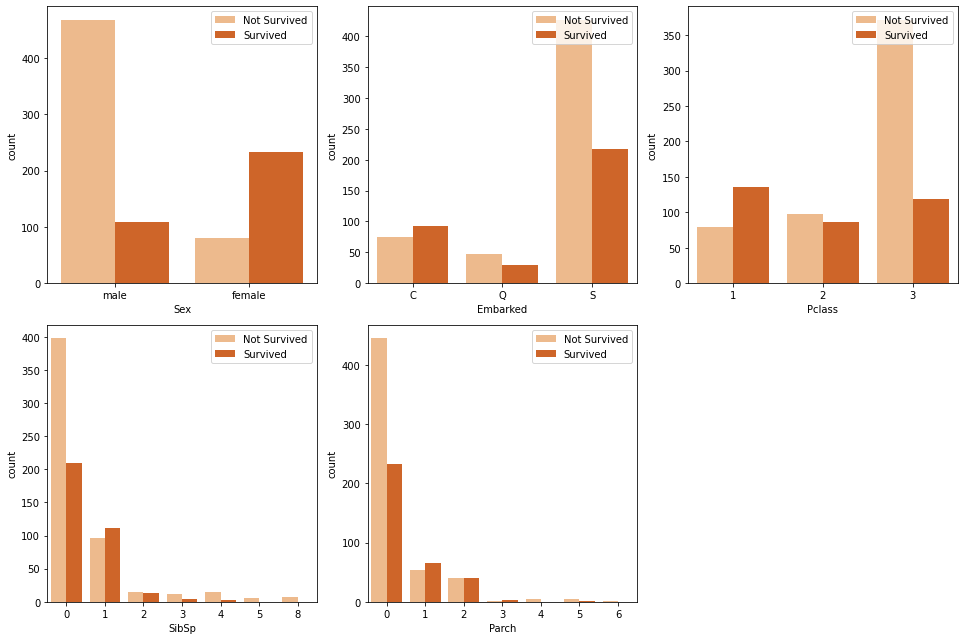

In [16]:
cols=['Sex','Embarked','Pclass','SibSp','Parch']

n_rows=2
n_cols=3

fig,ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*4.5,n_rows*4.5))#tạo subplot cho các cột
 #vong for ve cho 5 box
for r in range (0,n_rows):
    for c in range (0,n_cols):
        i=(r*n_cols)+c;
        if i < len(cols):
            ax_i=ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue='Survived',palette='Oranges',ax=ax_i);
            ax_i.legend(title='',loc="upper right",labels=["Not Survived","Survived"]);
ax.flat[-1].set_visible(False) #xóa 1 ô bị thừa
plt.tight_layout() #dãn cách tiêu đề 

##### Thu hoạch
biểu đồ 1: Nữ > Nam

biều đồ 2: C > Q > S

biểu đồ 3: class 1> 2> 3

biều đồ 4: có 1 anh chị em có tỉ lệ sống sót >1, sau đó đến 2 ~~ 1, 0.9

biều đồ 5: có 1-> 2 con có tỉ lệ ss cao > 1

## Data Preprocessing

### Data Wragling and Feature Engineering

In [17]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [18]:
#hàm extract danh hiệu miss, mr đằng trước 
import re
def extract_title(name):
    p = re.compile(r",([\w\s].+)\.") 
    return p.search(name).groups(1)[0].strip()    
train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name) ) #dat ten cot moi la title, chua danh hieu da extract
train_df['Title'].value_counts()

Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: Title, dtype: int64

In [19]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name) )
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [20]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title']=train_df['Title'].apply(lambda title: group_title(title))
test_df['Title']=test_df['Title'].apply(lambda title: group_title(title))

<AxesSubplot: xlabel='Title', ylabel='count'>

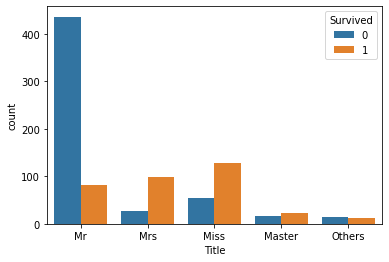

In [21]:
sns.countplot(data=train_df, x='Title',hue = 'Survived')

Almost Mr die

In [22]:
#Family size = combine parch and sibsp
train_df['Family_Size']=train_df['SibSp'].astype('int')+train_df['Parch'].astype('int')+1
test_df['Family_Size']=test_df['SibSp'].astype('int')+test_df['Parch'].astype('int')+1

In [23]:
#phan loai gia dinh theo so luong thanh vien
train_df['Family_Cat']=pd.cut(train_df['Family_Size'],bins=[0,1,4,7,20],labels=['Single','Small','Medium','Large'])
#0-1: single; 1-4: small; 4-7: medium; 7-20:large
test_df['Family_Cat']=pd.cut(test_df['Family_Size'],bins=[0,1,4,7,20],labels=['Single','Small','Medium','Large'])

<AxesSubplot: xlabel='Family_Cat', ylabel='count'>

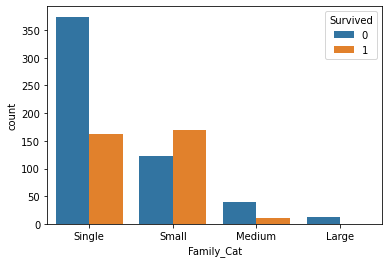

In [24]:
sns.countplot(data=train_df,x="Family_Cat",hue='Survived')

### Data Wrangling

In [25]:
num_features=['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
features_cols = num_features + cat_features

In [26]:
def missing_display(df,features_cols):
    n_rows=df.shape[0]
    for col in features_cols:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values")
missing_display(train_df,features_cols)
missing_display(test_df,features_cols)

Age has 19.87% missing values
Embarked has 0.22% missing values
Age has 20.57% missing values
Fare has 0.24% missing values


#### Filling missing value
##### Age

- Filling with 'Median' of whole dataset

In [31]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']
age_by_pclass

C:\Users\admin\AppData\Local\Temp\ipykernel_19080\2706246634.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [37]:
#fill missing values
train_df['Age']=train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age']=test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\admin\AppData\Local\Temp\ipykernel_19080\454822626.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age']=train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
C:\Users\admin\AppData\Local\Temp\ipykernel_19080\454822626.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

In [40]:
missing_display(train_df,features_cols)

Embarked has 0.22% missing values


In [41]:
missing_display(test_df,features_cols)

Fare has 0.24% missing values


vì lượng missing values của cột age rất lớn nên phải dùng cách này, các cột khác sẽ dùng SimpleImputer của scikitlearn để fill


- Split train data thành x và y, x là các feature y là survived


In [45]:
X= train_df[features_cols]
Y=train_df['Survived']

In [47]:
X_test=test_df[features_cols]

In [60]:
# preprocess pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

In [49]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [50]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [51]:
preprocessed_X_df = pd.DataFrame(preprocessor.transform(X), columns=X.columns)# X -> X_train, X_val
preprocessed_X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=X_test.columns)

In [52]:
preprocessed_X_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,-0.534891,-0.502445,male,3,S,Mr,Small
1,0.668392,0.786845,female,1,C,Mrs,Small
2,-0.23407,-0.488854,female,3,S,Miss,Single
3,0.442776,0.42073,female,1,S,Mrs,Small
4,0.442776,-0.486337,male,3,S,Mr,Single


In [53]:
preprocessed_X_test_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,0.405174,-0.490783,male,3,Q,Mr,Single
1,1.345238,-0.507479,female,3,S,Mrs,Small
2,2.473316,-0.453367,male,2,Q,Mr,Single
3,-0.158865,-0.474005,male,3,S,Mr,Single
4,-0.534891,-0.401017,female,3,S,Mrs,Small


### Label Encoder for Categorical Feature

In [54]:
cat_features

['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [55]:
preprocessed_X_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       124
Master     40
Others     27
Name: Title, dtype: int64

In [56]:
preprocessed_X_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
preprocessed_X_df['Family_Cat'].value_counts()

Single    537
Small     292
Medium     49
Large      13
Name: Family_Cat, dtype: int64

In [62]:
oh_enc = OneHotEncoder(handle_unknown='ignore')
pd.DataFrame(oh_enc.fit_transform(preprocessed_X_df[['Title']]).toarray()).head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [63]:
le_enc = LabelEncoder()

pd.DataFrame(le_enc.fit_transform(preprocessed_X_df['Title'])).head()

,0
0,2
1,3
2,1
3,3
4,2


In [64]:
print(le_enc.classes_)

['Master' 'Miss' 'Mr' 'Mrs' 'Others']


In [65]:
for cat_col in ['Sex', 'Embarked', 'Title', 'Family_Cat']:
    le_enc = LabelEncoder()
    preprocessed_X_df.loc[:, cat_col] = le_enc.fit_transform(preprocessed_X_df[cat_col])
    preprocessed_X_test_df.loc[:, cat_col] = le_enc.transform(preprocessed_X_test_df[cat_col])
preprocessed_X_df.head()    

C:\Users\admin\AppData\Local\Temp\ipykernel_19080\165358944.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  preprocessed_X_df.loc[:, cat_col] = le_enc.fit_transform(preprocessed_X_df[cat_col])
C:\Users\admin\AppData\Local\Temp\ipykernel_19080\165358944.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  preprocessed_X_test_df.loc[:, cat_col] = le_enc.transform(preprocessed_X_test_df[cat_col])
C:\Users\admin\AppData\Local\Temp\ipykernel_19080\165358944.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the valu

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,-0.534891,-0.502445,1,3,2,2,3
1,0.668392,0.786845,0,1,0,3,3
2,-0.23407,-0.488854,0,3,2,1,2
3,0.442776,0.42073,0,1,2,3,3
4,0.442776,-0.486337,1,3,2,2,2


In [66]:
preprocessed_X_test_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat
0,0.405174,-0.490783,1,3,1,2,2
1,1.345238,-0.507479,0,3,2,3,3
2,2.473316,-0.453367,1,2,1,2,2
3,-0.158865,-0.474005,1,3,2,2,2
4,-0.534891,-0.401017,0,3,2,3,3


In [67]:
def cast_types(df):
    df['Age'] = df['Age'].astype(float)
    df['Fare'] = df['Fare'].astype(float)
    df['Pclass'] = df['Pclass'].astype(int)
    return df

In [68]:
preprocessed_X_df = cast_types(preprocessed_X_df)
preprocessed_X_test_df = cast_types(preprocessed_X_test_df)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_val, y_train, y_val = train_test_split(preprocessed_X_df, y, test_size=0.2)

In [73]:
X_train.shape, X_val.shape

((712, 7), (179, 7))